<a href="https://colab.research.google.com/github/Timmmy88880/datascience/blob/main/%E5%AF%A6%E7%94%A8%E7%B5%B1%E8%A8%88%E5%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [ ]:
#from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Define paths to data sets (Please adapt the file paths accordingly)



sp500_px = pd.read_csv("/content/drive/MyDrive/資料科學/stata/sp500_data.csv.gz", index_col=0)
loan_data = pd.read_csv("/content/drive/MyDrive/資料科學/stata/loan_data.csv.gz")
housetasks = pd.read_csv("/content/drive/MyDrive/資料科學/stata/housetasks.csv", index_col=0)



In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse

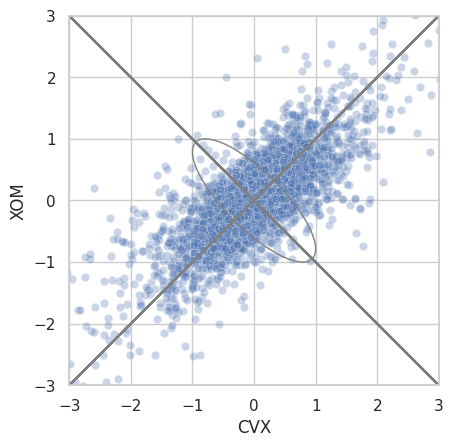

In [ ]:
oil_px = sp500_px[['CVX', 'XOM']]
pca = PCA()
oil_px_scaled = StandardScaler().fit_transform(oil_px)
pca.fit(oil_px_scaled)
loadings = pca.components_

sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.scatterplot(data=oil_px, x='CVX', y='XOM', alpha=0.3, ax=ax)
ax.set_xlabel('CVX')
ax.set_ylabel('XOM')

for loading in loadings:
    slope = loading[1] / loading[0]
    intercept = 0
    line = np.polyval([slope, intercept], oil_px['CVX'])
    ax.plot(oil_px['CVX'], line, color='grey', linestyle='--')

ellipse = Ellipse(
    xy=(0, 0),
    width=np.sqrt(pca.explained_variance_[0]) * 2,
    height=np.sqrt(pca.explained_variance_[1]) * 2,
    angle=np.rad2deg(np.arccos(loadings[0, 0])),
    edgecolor='grey',
    facecolor='none'
)
ax.add_patch(ellipse)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

In [ ]:
tech_px = sp500_px[['GOOGL', 'AAPL']]
#drop last row since it is NaN
#tech_px = tech_px.drop(3019)
kmeans = KMeans(n_clusters=4).fit(tech_px)
tech_px['cluster'] = kmeans.labels_
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['GOOGL', 'AAPL'])
print(centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       GOOGL      AAPL
0  -3.630397 -0.303216
1   0.083509  0.013475
2   5.189457  0.338733
3 -10.518782 -0.911196


<ipython-input-150-989223614f4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_px['cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


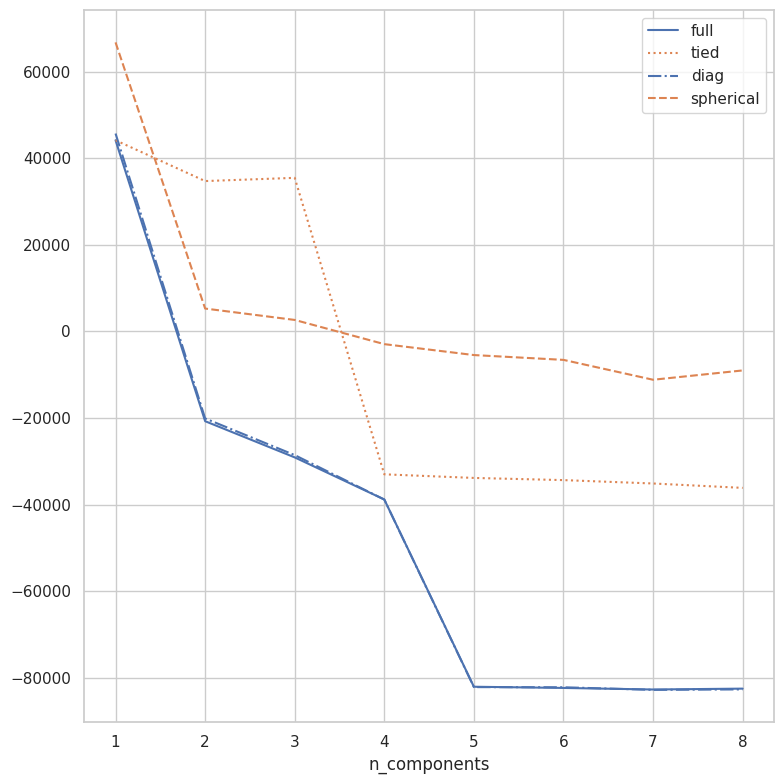

In [ ]:
results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for n_components in range(1, 9):
    for covariance_type in covariance_types:
        mclust = GaussianMixture(n_components = n_components, warm_start=True,
                                 covariance_type = covariance_type)
        mclust.fit(tech_px)
        results.append({
            'bic': mclust.bic(tech_px),
            'n_components': n_components,
            'covariance_type': covariance_type,
        })

results = pd.DataFrame(results)
colors = ['C0', 'C1', 'C2', 'C3']
styles = ['C0-','C1:','C0-.', 'C1--']
fig, ax = plt.subplots(figsize=(8, 8))
for i, covariance_type in enumerate(covariance_types):
    subset = results.loc[results.covariance_type == covariance_type, :]
    subset.plot(x='n_components', y='bic', ax=ax, label=covariance_type,
                kind='line', style=styles[i]) # , color=colors[i])
plt.tight_layout()
plt.show()

In [ ]:
syms=sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
              'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp=sp500_px.loc[sp500_px.index >='2011-01-01',syms]
sp_pca=PCA()
sp_pca.fit(top_sp)

PCA()

In [ ]:
#remove rows with at least one NaN values
nan_rows = sp500_px[sp500_px.isnull().T.any()]
df_stock_return = sp500_px.drop(list(nan_rows.index))
syms = sorted(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM', 'GE',
               'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE',
               'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT', 'GOOGL', 'AMZN'])
top_df = sp500_px[syms]
kmeans = KMeans(n_clusters=4).fit(top_df)
from collections import Counter
print(Counter(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Counter({3: 3674, 1: 1151, 2: 562, 0: 260})


In [ ]:
ex=pd.DataFrame(sp_pca.explained_variance_)

Text(0.5, 0, 'component')

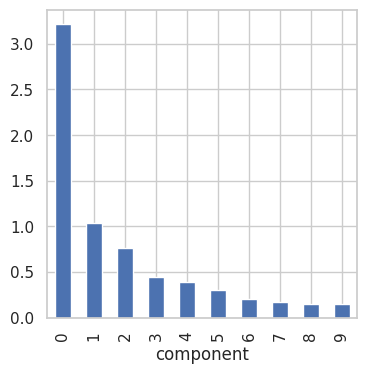

In [ ]:
ax=ex.head(10).plot.bar(legend=False,figsize=(4,4))
ax.set_xlabel('component')

Text(0.5, 0, 'component')

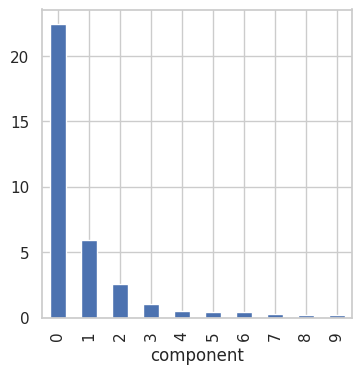

In [ ]:
syms=['GOOGL', 'AMZN','AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
              'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
top_sp1=sp500_px.loc[sp500_px.index >='2005-01-01',syms]

sp_pca1=PCA()
sp_pca1.fit(top_sp1)
explained_variance=pd.DataFrame(sp_pca1.explained_variance_)
ax=explained_variance.head(10).plot.bar(legend=False,figsize=(4,4))
ax.set_xlabel('component')

In [ ]:
loadings_rounded = loadings.iloc[:, :2].round(3)
print(loadings_rounded)


   GOOGL   AMZN
0 -0.857 -0.445
1  0.478 -0.874


In [ ]:
loadings=pd.DataFrame(sp_pca1.components_[0:2,:],columns=top_sp1.columns)
loadings.transpose()

,0,1
GOOGL,-0.857310,0.477873
AMZN,-0.444728,-0.874149
AAPL,-0.071627,-0.020802
MSFT,-0.036002,-0.006204
CSCO,-0.029205,-0.003045
INTC,-0.026666,-0.006069
CVX,-0.089548,-0.037420
XOM,-0.080336,-0.020511
SLB,-0.110218,-0.030356
COP,-0.057739,-0.024117


第一成份和第二成份由google amaz支配

主成份分析計算原則是使成分間相關性最小，以一組有限的主成份代替原始變數，降低為度

# KMEANS

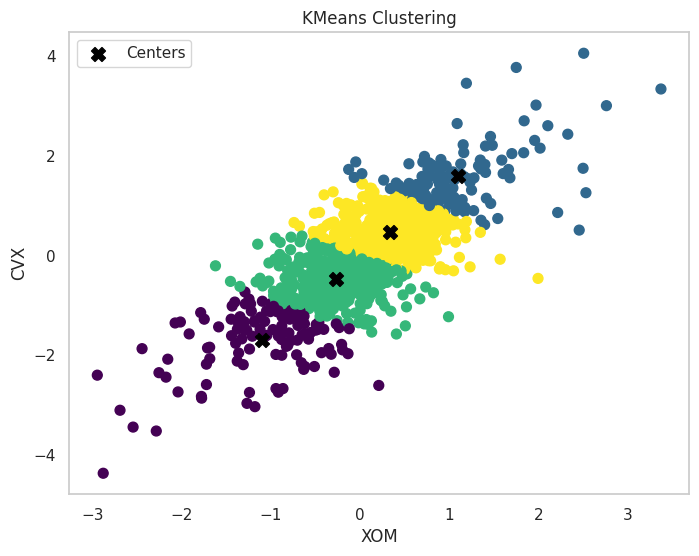

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 假设您有一个名为sp500_px的DataFrame，包含股票价格数据，行索引是日期
# 假设数据已经加载到sp500_px DataFrame中

# 选择所需的股票列
selected_stocks = ['XOM', 'CVX']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', selected_stocks]

# 执行KMeans聚类
km = KMeans(n_clusters=4, n_init=1, random_state=1010103)
km.fit(df)
cluster_labels = km.labels_

# 将聚类结果添加到DataFrame
df['cluster'] = cluster_labels

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(df['XOM'], df['CVX'], c=df['cluster'], cmap='viridis', marker='o', s=50)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', marker='X', s=100, label='Centers')
plt.xlabel('XOM')
plt.ylabel('CVX')
plt.title('KMeans Clustering')
plt.legend()
plt.grid()
plt.show()


# 選擇分群的數量

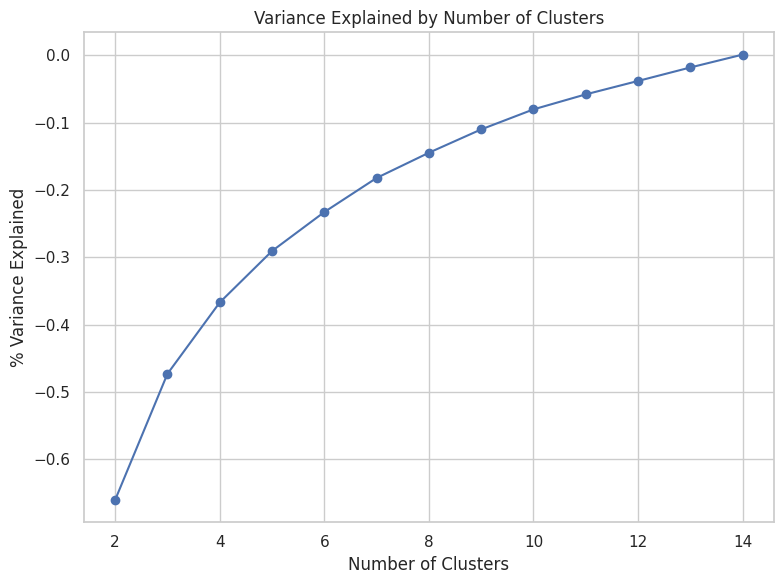

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 假设您有一个名为sp500_px的DataFrame，包含股票价格数据，行索引是日期
# 假设数据已经加载到sp500_px DataFrame中

# 选择所需的股票列
selected_stocks = ['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
                   'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', selected_stocks]

# 计算总的SS
total_ss = KMeans(n_clusters=14, n_init=50, max_iter=100).fit(df).inertia_

# 计算每个簇数对应的% Variance Explained
pct_var = []
for i in range(2, 15):
    km = KMeans(n_clusters=i, n_init=50, max_iter=100)
    km.fit(df)
    between_ss = total_ss - km.inertia_
    pct_var.append({'num_clusters': i, 'pct_var': between_ss / total_ss})

# 创建DataFrame
pct_var_df = pd.DataFrame(pct_var)

# 绘制图表
plt.figure(figsize=(8, 6))
plt.plot(pct_var_df['num_clusters'], pct_var_df['pct_var'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('% Variance Explained')
plt.xticks(np.arange(2, 15, step=2))
plt.title('Variance Explained by Number of Clusters')
plt.tight_layout()
plt.show()


統計上沒有最好的分群數量

# 階層式分群

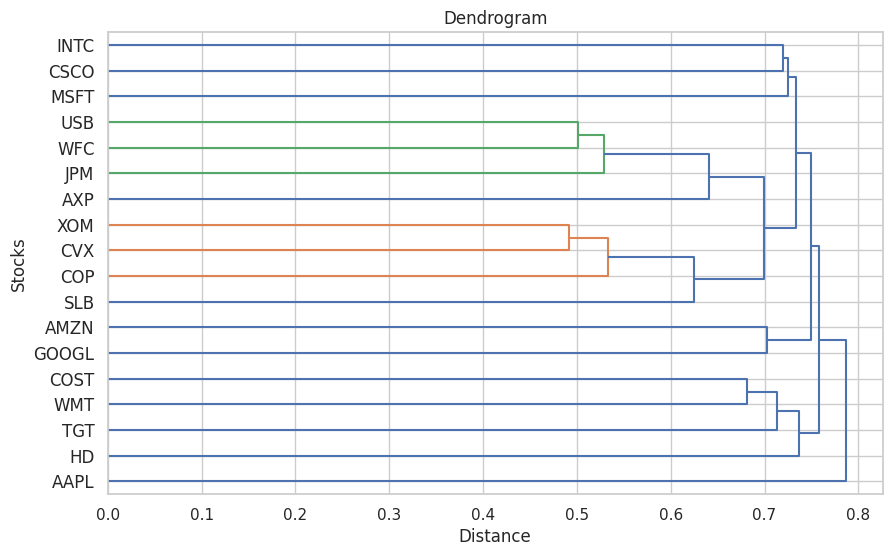

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 假设您有一个名为sp500_px的DataFrame，包含股票价格数据，行索引是日期
# 假设数据已经加载到sp500_px DataFrame中

# 选择所需的股票列
selected_stocks = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX',
                   'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP',
                   'WMT', 'TGT', 'HD', 'COST']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', selected_stocks]

# 计算相关系数矩阵
correlation_matrix = df.corr()

# 计算距离矩阵
d = np.sqrt(1 - np.abs(correlation_matrix))

# 层次聚类
hcl = linkage(squareform(d))

# 绘制谱系图
plt.figure(figsize=(10, 6))
dendrogram(hcl, labels=selected_stocks, orientation='right')
plt.xlabel('Distance')
plt.ylabel('Stocks')
plt.title('Dendrogram')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# 假设hcl是已经计算好的层次聚类结果
k = 4  # 要划分的簇数
cluster_labels = fcluster(hcl, t=k, criterion='maxclust')

print(cluster_labels)


[2 2 4 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1]


In [ ]:
syms1 = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX',
         'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP',
         'WMT', 'TGT', 'HD', 'COST']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', syms1].transpose()

Z=linkage(df,method='complete')
memb=fcluster(Z,4,criterion='maxclust')
memb=pd.Series(memb,index=df.index)
for key,item in memb.groupby(memb):
  print(f"{key}:{','.join(item.index)}")

1:CVX,XOM,SLB,COP
2:AAPL,MSFT,CSCO,INTC,JPM,WFC,USB,AXP,WMT,TGT,HD,COST
3:AMZN
4:GOOGL


階層式演算法一開始每條紀錄會單獨成為一個集群，在聚合演算法中，集群逐步與相鄰的群合併，直到所有記錄都屬於單一集群。

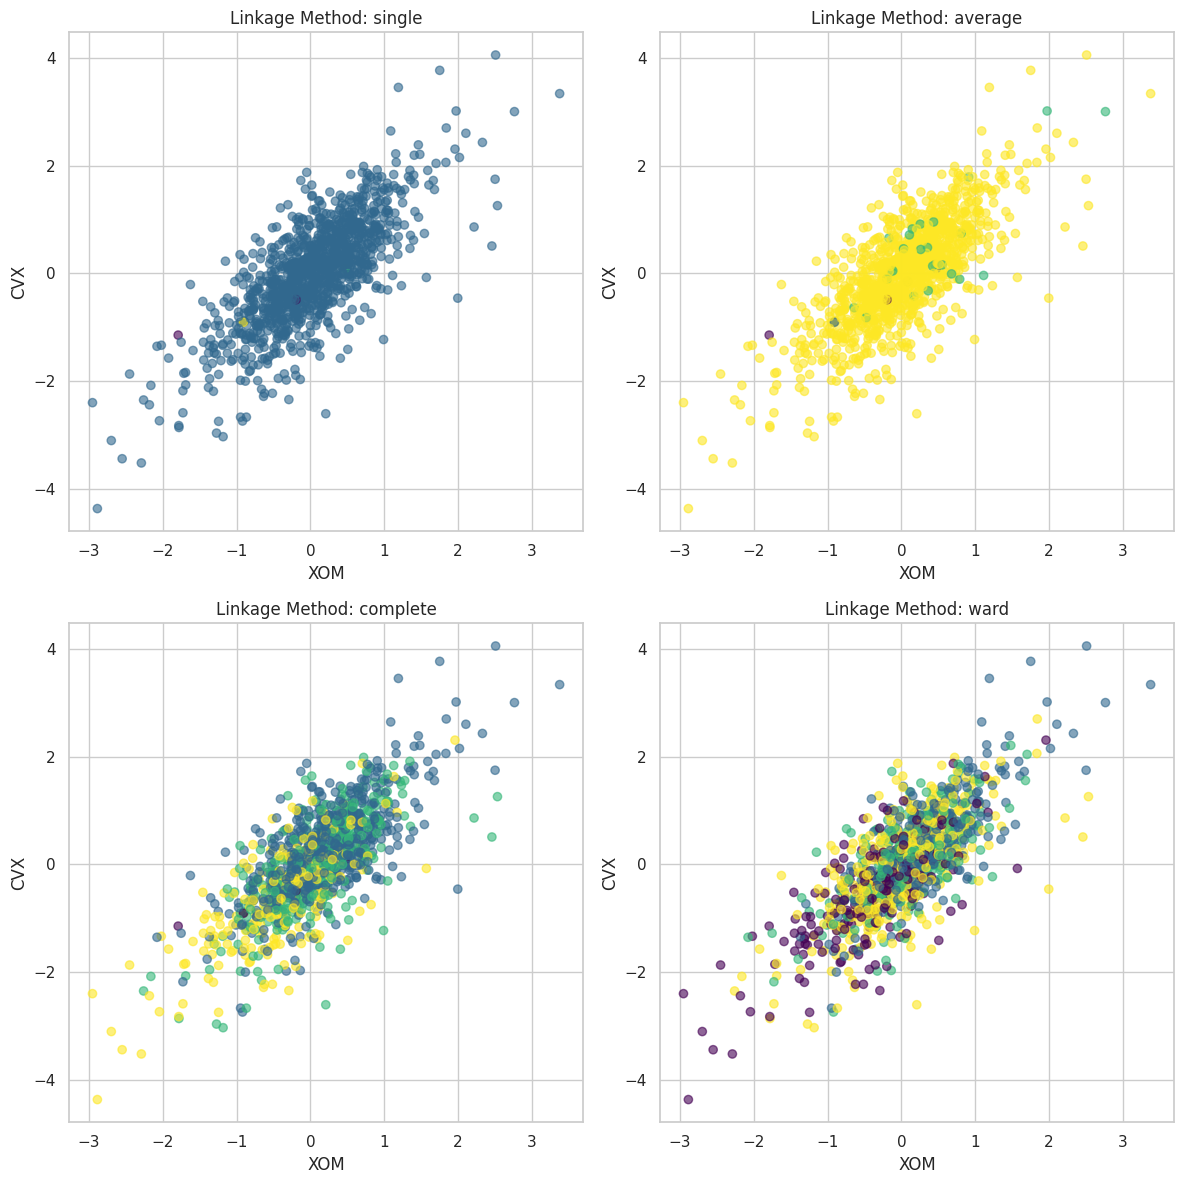

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named sp500_px containing your data

# Define the cluster_fun function
def cluster_fun(df, method):
    d = pdist(df)
    hcl = linkage(d, method=method)
    tree = fcluster(hcl, t=4, criterion='maxclust')
    df[method] = tree
    return df

# Selecting the relevant symbols
syms1 = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX',
         'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP',
         'WMT', 'TGT', 'HD', 'COST']

# Subsetting the DataFrame
df0 = sp500_px[sp500_px.index >= '2011-01-01'][syms1]

# Create a figure and axis for plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
methods = ['single', 'average', 'complete', 'ward']

# Loop through each method and plot the clusters
for method, ax in zip(methods, axes.ravel()):
    df = cluster_fun(df0, method)
    ax.scatter(df['XOM'], df['CVX'], c=df[method], cmap='viridis', alpha=0.6)
    ax.set_title(f'Linkage Method: {method}')
    ax.set_xlabel('XOM')
    ax.set_ylabel('CVX')

plt.tight_layout()
plt.show()


完全連結法、單一連結、平均連結、最小變異數

# 基於模型的集群分析


## 混合常態分佈

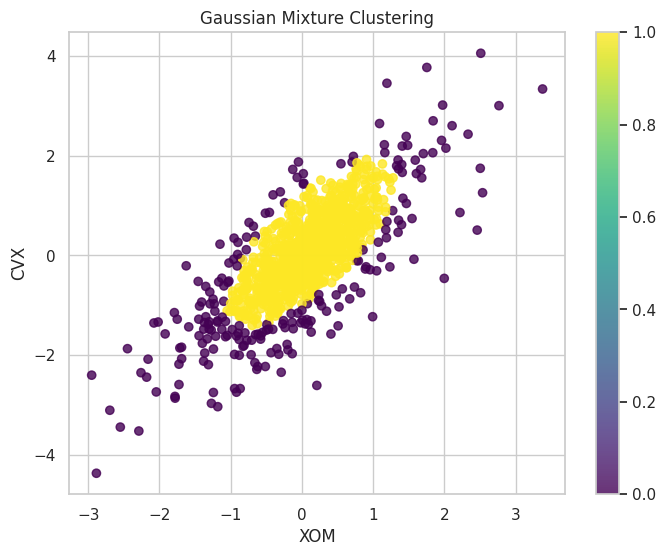

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

# Assuming you have a DataFrame named sp500_px with the data
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]

# Fit Gaussian Mixture Model
mcl = GaussianMixture(n_components=2)
mcl.fit(df)

# Predict cluster assignments
cluster = mcl.predict(df)
df['cluster'] = cluster

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['XOM'], df['CVX'], c=df['cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('XOM')
plt.ylabel('CVX')
plt.title('Gaussian Mixture Clustering')
plt.colorbar()
plt.show()


圖中有兩個集群，一個是kmeans和階層式

In [ ]:

# Print the means, covariances, and weights
print("Means:")
print(mcl.means_)
print("Covariances:")
print(mcl.covariances_)





Means:
[[-0.03752033  0.186752  ]
 [-1.12245494 -1.21019262]
 [ 1.75004823  1.72133626]
 [ 0.887037    1.26288807]
 [-1.53668546 -2.4256856 ]
 [-0.51994546 -0.59672717]
 [ 0.43352366  0.26819581]
 [-0.37723325 -1.30044163]
 [-0.07433936 -0.38570121]
 [ 0.42808577  0.88038564]]
Covariances:
[[[ 0.08164257 -0.00784842]
  [-0.00784842  0.0765556 ]]

 [[ 0.16174952  0.03489513]
  [ 0.03489513  0.18116257]]

 [[ 0.40047935  0.32166617]
  [ 0.32166617  1.47737811]]

 [[ 0.08715824  0.05411839]
  [ 0.05411839  0.22264407]]

 [[ 0.6440177   0.26265011]
  [ 0.26265011  0.49063946]]

 [[ 0.07464626 -0.00174115]
  [-0.00174115  0.14706154]]

 [[ 0.07019437 -0.01133236]
  [-0.01133236  0.09349064]]

 [[ 0.25553676  0.07339255]
  [ 0.07339255  0.23802798]]

 [[ 0.07435359 -0.00217044]
  [-0.00217044  0.07185542]]

 [[ 0.12960107 -0.02919898]
  [-0.02919898  0.1053547 ]]]


## 選擇分群數量

In [ ]:
results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for n_components in range(1, 9):
    for cov_type in covariance_types:  # Use a different variable name
        mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=cov_type)  # Use cov_type
        mclust.fit(df)
        results.append({'bic': mclust.bic(df), 'n_components': n_components, 'covariance_type': cov_type})  # Use covariance_type




In [ ]:
results=pd.DataFrame(results)

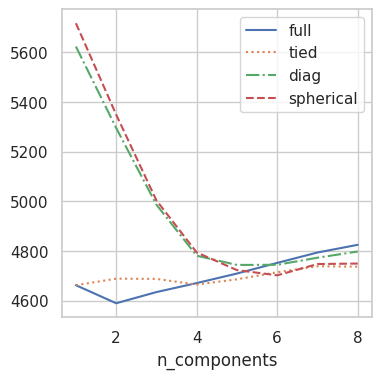

In [ ]:
colors=['C0','C1','C2','C3']
styles=['C0-','C1:','C2-.','C3--']

fig,ax=plt.subplots(figsize=(4,4))
for i, covariance_type in enumerate(covariance_types):
  subset=results.loc[results.covariance_type==covariance_type,:]
  subset.plot(x='n_components',y='bic',ax=ax,label=covariance_type,kind='line',style=styles[i])

請看bic的解釋：繪製的是bic的值

# 調整變數尺度

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have the 'loan_data' DataFrame
defaults = loan_data[loan_data['outcome'] == 'default']
selected_columns = ['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 'revol_util']
df = defaults[selected_columns]

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=selected_columns)

# Print the cluster centers
print(round(centers, 2))

# Scale the variables and perform k-means clustering again
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
kmeans_scaled = KMeans(n_clusters=4, n_init=10)
kmeans_scaled.fit(df_scaled)
centers_scaled = pd.DataFrame(scaler.inverse_transform(kmeans_scaled.cluster_centers_), columns=selected_columns)

# Print the scaled cluster centers
print(round(centers_scaled, 2))


   loan_amnt  annual_inc  revol_bal  open_acc    dti  revol_util
0   21764.43   164377.85   38592.72     12.60  13.53       63.63
1   10569.91    42354.64   10240.34      9.57  17.71       58.09
2   22570.19   489783.40   85161.35     13.33   6.91       59.65
3   18245.92    82998.38   19573.73     11.66  16.79       62.26
   loan_amnt  annual_inc  revol_bal  open_acc    dti  revol_util
0   13208.10    55299.88   16263.47     14.20  24.24       59.44
1   25862.76   115272.32   32562.94     12.44  16.32       66.18
2   10366.03    53656.31    6019.29      8.66  11.25       30.55
3   10458.98    51135.59   11500.48      7.47  15.73       77.72


# 混合分群資料問題

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming you have loaded the defaults dataset into a pandas DataFrame named 'defaults'

# Selecting columns for clustering
selected_columns = ['dti', 'payment_inc_ratio', 'home_', 'pub_rec_zero']
df = defaults[selected_columns]

# Preprocessing: Using one-hot encoding for categorical column 'home_'
df = pd.get_dummies(df, columns=['home_'])

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform k-means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
kmeans.fit(df_scaled)

# Getting cluster centers and scaling them back
centers = kmeans.cluster_centers_
centers_rescaled = scaler.inverse_transform(centers)

# Displaying the rescaled cluster centers
centers_df = pd.DataFrame(centers_rescaled, columns=df.columns)
print(centers_df.round(2))


     dti  payment_inc_ratio  pub_rec_zero  home__MORTGAGE  home__OWN  \
0  17.46               8.42          1.00            1.00        0.0   
1  16.99               9.11          1.00           -0.00       -0.0   
2  17.20               9.27          0.92            0.00        1.0   
3  16.50               8.06          0.00            0.52       -0.0   

   home__RENT  
0       -0.00  
1        1.00  
2       -0.00  
3        0.48  


如果使用標準z分數，則二元變數將主導分群的定義，並且kmeans是透過0\1指定分配給集群，以獲得較小的集群評分和

解決分法：對二元變數進縮放，以使其變異數小於其他變數。可以將分群法應用於特定類別值得各個資子即。例如：將分群應用於有房貸貸款、無房貸貸款、租屋貸款者





[連結文字](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

Automatically created module for IPython interactive environment


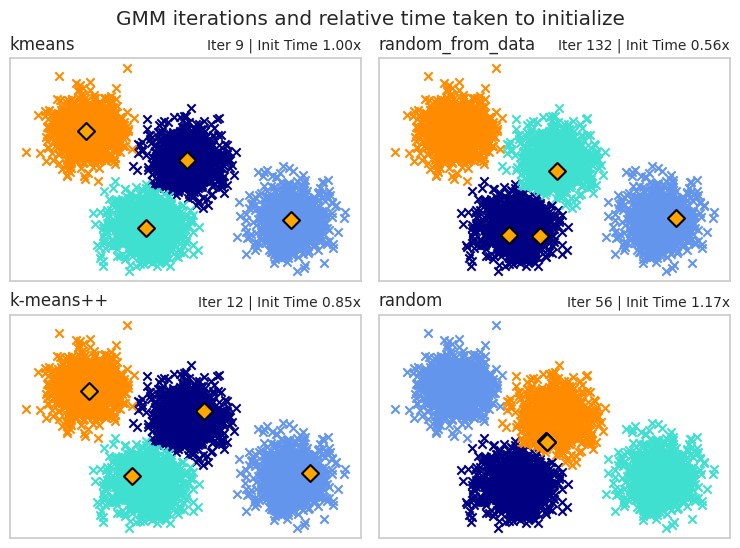

In [ ]:
# Author: Gordon Walsh <gordon.p.walsh@gmail.com>
# Data generation code from Jake Vanderplas <vanderplas@astro.washington.edu>

from timeit import default_timer as timer

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets._samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.utils.extmath import row_norms

print(__doc__)

# Generate some data

X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

n_samples = 4000
n_components = 4
x_squared_norms = row_norms(X, squared=True)


def get_initial_means(X, init_params, r):
    # Run a GaussianMixture with max_iter=0 to output the initialization means
    gmm = GaussianMixture(
        n_components=4, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_


methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]
times_init = {}
relative_times = {}

plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    start = timer()
    ini = get_initial_means(X, method, r)
    end = timer()
    init_time = end - start

    gmm = GaussianMixture(
        n_components=4, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    times_init[method] = init_time
    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

    plt.scatter(
        ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black"
    )
    relative_times[method] = times_init[method] / times_init[methods[0]]

    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title(
        "Iter %i | Init Time %.2fx" % (gmm.n_iter_, relative_times[method]),
        loc="right",
        fontsize=10,
    )
plt.suptitle("GMM iterations and relative time taken to initialize")
plt.show()

# 第三章

In [ ]:
#from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
imanishi = pd.read_csv("/content/drive/MyDrive/資料科學/stata/imanishi_data.csv", index_col=0)
four_sessions = pd.read_csv("/content/drive/MyDrive/資料科學/stata/four_sessions.csv", index_col=0)
click_rate = pd.read_csv("/content/drive/MyDrive/資料科學/stata/click_rates.csv", index_col=0)
session_times = pd.read_csv("/content/drive/MyDrive/資料科學/stata/web_page_data.csv", index_col=0)
session_times['Time'] = session_times['Time'] * 100





# 黏著度分析

Text(0.5, 0.98, '')

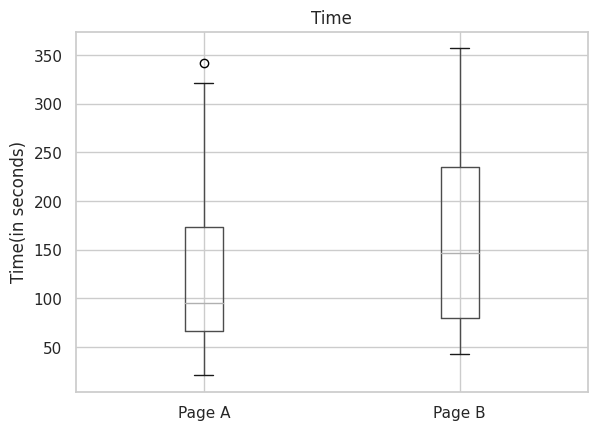

In [ ]:
ax=session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time(in seconds)')
plt.suptitle('')

# 統計顯著性

In [ ]:
import random

In [ ]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_b = set(random.sample(range(n),nB))
    idx_a = set(range(n))-idx_b
    return x.loc[idx_b].mean()-x.loc[idx_a].mean()

In [ ]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
conversion = np.concatenate((np.zeros(45945), np.ones(382)))
perm_diffs = np.zeros(1000)

<ipython-input-190-9e862e589e40>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_b].mean()-x.loc[idx_a].mean()
<ipython-input-190-9e862e589e40>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_b].mean()-x.loc[idx_a].mean()
<ipython-input-190-9e862e589e40>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_b].mean()-x.loc[idx_a].mean()
<ipython-input-190-9e862e589e40>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_b].mean()-x.loc[idx_a].mean()
<ipython-input-190-9e862e589e40>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_b].mean()-x.loc[idx_a].mean()
<ipython-i

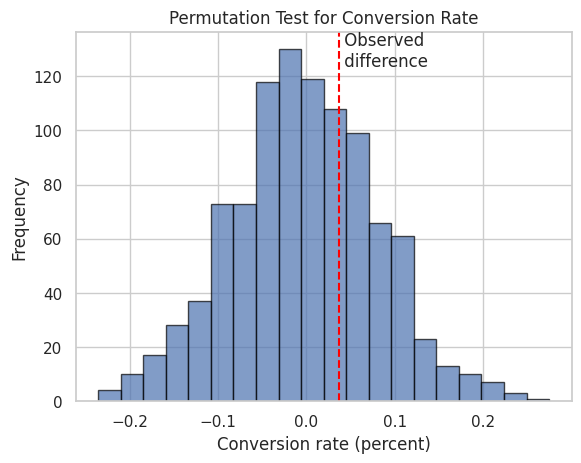

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
conversion=[0]*45945
conversion.extend([1]*382)
conversion=pd.Series(conversion)
perm_diffs = np.zeros(1000)

perm_diffs =[ 100 * perm_fun(conversion, 23739, 22588)
for _ in range(1000)]


plt.hist(perm_diffs, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=obs_pct_diff, linestyle='dashed', color='red', linewidth=1.5)
plt.text(obs_pct_diff, plt.ylim()[1], ' Observed\n difference', verticalalignment='top', horizontalalignment='left')
plt.xlabel('Conversion rate (percent)')
plt.ylabel('Frequency')
plt.title('Permutation Test for Conversion Rate')
plt.show()


# P值

In [ ]:
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Convert perm_diffs to a NumPy array for comparison
perm_diffs = np.array(perm_diffs)

# Calculate the proportion of perm_diffs greater than the observed difference
p_value = np.mean(perm_diffs > obs_pct_diff)

# Perform the one-sided proportion test
observed = np.array([200, 182])
total = np.array([23739, 22588])
prop_test_result = sm.stats.proportions_ztest(observed, total, alternative='larger')

print("P-value from permutation test:", p_value)
print("P-value from one-sided proportion test:", prop_test_result[1])


P-value from permutation test: 0.321
P-value from one-sided proportion test: 0.33094407441560325


In [ ]:
click_rate

,Click,Rate
Headline,,
Headline A,Click,14
Headline A,No-click,986
Headline B,Click,8
Headline B,No-click,992
Headline C,Click,12
Headline C,No-click,988


# 檢定力和樣本規模

In [ ]:
import statsmodels.api as sm

# Given effect size and other parameters

sig_level = 0.05
power = 0.8
alternative = 'larger'  # 'greater' corresponds to 'larger' in statsmodels

# Perform power calculation
result = sm.stats.proportion_effectsize(0.0121,0.011)
sample_size = sm.stats.tt_ind_solve_power(
    effect_size=result,
    alpha=sig_level,
    power=power,
    alternative=alternative
)

print("Sample size:", sample_size)


Sample size: 116602.39259746042


# 分類

In [ ]:
loan3000  = pd.read_csv("/content/drive/MyDrive/資料科學/stata/loan3000.csv")
loan_data = pd.read_csv("/content/drive/MyDrive/資料科學/stata/loan_data.csv.gz", compression='gzip')
full_train_set = pd.read_csv("/content/drive/MyDrive/資料科學/stata/full_train_set.csv.gz", compression='gzip')



In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.naive_bayes import CategoricalNB


# Drop rows with missing values
loan_data = loan_data.dropna()

# Define the features and target variable
predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
x=pd.get_dummies(loan_data[predictors],prefix='',prefix_sep='')
y=loan_data[outcome]

# Create the Naive Bayes model
naive_model = MultinomialNB(alpha=0.01,fit_prior=True)
naive_model.fit(x,y)

# Define the new loan data
new_loan = x.loc[146:146,:]



In [ ]:

# Predict the outcome for the new loan
print('predicted class:',naive_model.predict(new_loan)[0])


predicted class: default


In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

# Drop rows with missing values
loan_data = loan_data.dropna()

# Define the features and target variable
predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'

x = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='')
y = loan_data[outcome]

# Convert the outcome column to categorical dtype
y = y.astype('category')

# Create the Naive Bayes model
naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
naive_model.fit(x, y)

# Define the new loan data
new_loan = x.loc[146:146, :]

# Predict the outcome for the new loan
predicted_class = naive_model.predict(new_loan)[0]
print('predicted class:', predicted_class)

# Get the predicted probabilities
probabilities = pd.DataFrame(naive_model.predict_proba(new_loan), columns=naive_model.classes_)

print(probabilities)


predicted class: default
    default  paid off
0  0.653696  0.346304
